In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_city_df = pd.merge(ride_data, city_data, on = "city", how = "outer")
# Display the data table for preview
ride_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

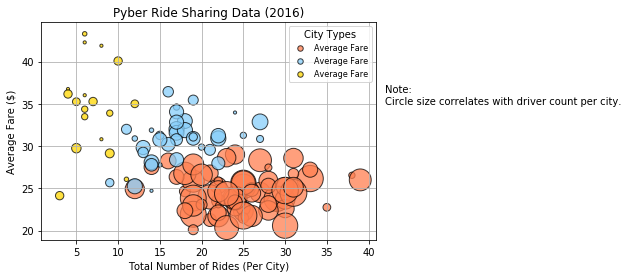

In [2]:
# Obtain the x and y coordinates for each of the three city types
ride_city_group = ride_city_df.groupby(["city", "type"])


fare_average = ride_city_group["fare"].mean().reset_index()
ride_count = ride_city_group["ride_id"].count().reset_index()
driver_count = ride_city_group["driver_count"].mean().reset_index()

ride_city_summary = pd.merge(fare_average, ride_count, on = ["city", "type"], how = "left")
ride_city_summary = pd.merge(ride_city_summary, driver_count, on = ["city", "type"], how = "left")
ride_city_summary = ride_city_summary.rename(columns = {"fare": "Average Fare", "ride_id":"Total Rides per City", "driver_count": "Driver Count per City"})
ride_city_summary.head()

# Build the scatter plots for each city types
type_list = [("Urban", "coral"),("Suburban","lightskyblue"), ("Rural","gold")]
for city_type, color in type_list:
    city = ride_city_summary.groupby("type").get_group(city_type)
    plt.scatter(city["Total Rides per City"], city["Average Fare"], s = city["Driver Count per City"]*10, color = color,
               edgecolor="black", alpha = 0.75, marker="o")


plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("pyber_ride_sharing_data.png", bbox_inches="tight")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

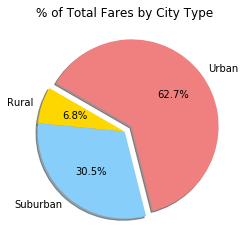

In [4]:
# Calculate Type Percents
city_type_group = ride_city_df.groupby(["type"])
group_total_fare = city_type_group["fare"].sum()

#Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(group_total_fare, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title("% of Total Fares by City Type")

#Save Figure
plt.savefig("Total Fares by City Type")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

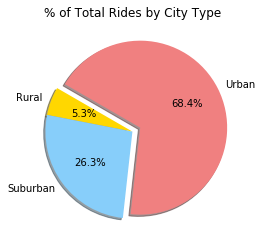

In [6]:
# Calculate Ride Percents
group_total_ride = city_type_group["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(group_total_ride, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Total Rides by City Type")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64


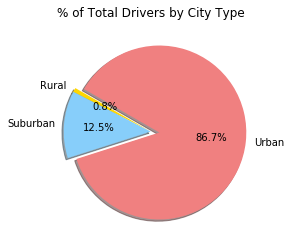

In [8]:
# Calculate Driver Percents
group_total_driver = city_type_group["driver_count"].sum()
print(group_total_driver)
# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(group_total_driver, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Total Drivers by City Type")



In [9]:
# Show Figure
plt.show()